In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("laptop.csv")
df

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,4403,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3972,4404,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3973,4405,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,Not Expandable,16 GB,DDR4 RAM,3.1 Ghz Processor,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3974,4407,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,32 GB Expandable,8 GB,DDR4 RAM,2.1 Ghz Processor,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


In [92]:
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [93]:
df.shape

(3976, 18)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

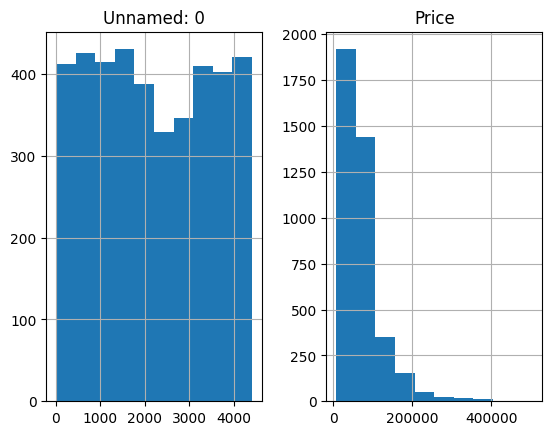

In [94]:
df.hist()

In [95]:
df.describe(include='all')

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3976.000000,3976,3976,3976.000000,3976,3976,3976,3976,3976,3976,3976,3976,3968,3972,3976,3976,3976,3558
unique,NaN,31,3941,NaN,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,NaN,ASUS,Lenovo ThinkBook 16 G6 (21KHA0J6IN) Laptop (16...,NaN,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,NaN,989,2,NaN,316,3009,2157,1608,1505,331,2034,2205,651,1939,1931,3014,1458,803
mean,2181.495724,NaN,NaN,72432.528672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1297.029657,NaN,NaN,52207.650948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,7990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1058.750000,NaN,NaN,39873.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2098.500000,NaN,NaN,58990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3342.250000,NaN,NaN,84990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.isna().sum()

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

### Verificare intrari duplicate dupa nume

In [97]:
df.loc[df.duplicated(subset=['Name'])]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
1989,2102,HP,HP 15-fd0011TU (7P703PA) Laptop (15.6 Inch | C...,53490,3.4 Ghz Processor,3.4,16 GB Expandable,8 GB,DDR4 RAM,0,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
2066,2195,MSI,MSI Katana GF66 12UC-632IN Laptop (15.6 Inch |...,84990,Intel Core i7 (12th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.7 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,240,240W Adapter
2105,2242,ASUS,ASUS VivoBook 15 X1500EA-EJ322WS Laptop (15.6 ...,33800,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,512 GB SSD Storage,No HDD,65,Upto 6 Hrs Battery Life
2108,2249,ASUS,ASUS VivoBook 15 X1502ZA-EJ541WS Laptop (15.6 ...,53990,Intel Core i5 (12th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.5 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
2146,2295,Lenovo,Lenovo Ideapad Gaming 3 15IHU6 (82K101EEIN) La...,64500,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 4.5 Hrs Battery Life
2184,2347,Dell,Dell Inspiron 14 7420 (D560779WIN9S) Laptop (1...,103990,Intel Core i7 (12th Gen),Intel,Not Expandable,16 GB,DDR5 RAM,3.4 Ghz Processor,LCD,14,"GeForce MX550 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 7 Hrs Battery Life
2255,2442,HP,HP Pavilion Aero 13-be2046AU (7S449PA) Laptop ...,85500,AMD Octa-Core Ryzen 7,AMD,16 GB Expandable,16 GB,DDR5 RAM,4.7 Ghz Processor,LCD,13.3,Radeon,AMD,1024 GB SSD Storage,No HDD,65,65W Adapter
2256,2445,ASUS,ASUS TUF Gaming A15 FA506IHRZ-HN113W Laptop (1...,63250,AMD Hexa-Core Ryzen 5,AMD,32 GB Expandable,16 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,Upto 8 Hrs Battery Life
2257,2448,HP,HP Pavilion 14-dv1029TU (5D0C2PA) Laptop (14 I...,102200,Intel Core i7 (11th Gen),Intel,Not Expandable,16 GB,DDR4 RAM,2.7 Ghz Processor,LCD,14,Iris Xe,Intel,1024 GB SSD Storage,No HDD,65,65W Adapter
2292,2492,Samsung,Samsung Galaxy Book Pro Intel Evo NP940XFG-KC5...,99999,Intel Core i7 (13th Gen),Intel,Not Expandable,16 GB RAM,RAM,2.2 Ghz Processor,LED,14,Iris Xe,Intel,1024 GB SSD Storage,No HDD,63,Upto 16 Hrs Battery Life


### Analizare un laptop duplicat

Din analiza reiese faptul ca inregistrarile reprezinta un laptop cu aceleasi specificatii, singura diferenta fiind pretul.

In [98]:
df[df['Name'].str.contains('Dell Inspiron 15 (D560721WIN9BD)', regex=False)]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
691,729,Dell,Dell Inspiron 15 (D560721WIN9BD) Laptop (15.6 ...,42990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,256 GB SSD Storage,1024 GB HDD Storage,65,Upto 6 Hrs Battery Life
3905,4333,Dell,Dell Inspiron 15 (D560721WIN9BD) Laptop (15.6 ...,56990,Intel Core i5 (11th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,3.0 Ghz Processor,LCD,15.6,Integrated,Intel,256 GB SSD Storage,1024 GB HDD Storage,65,Upto 6 Hrs Battery Life


### Stergere elemente duplicate din dataset

Elementele care au datele din coloanele specificate la fel vor fi sterse. Va ramane doar prima inregistrare din dataset.

In [99]:
df = df.loc[~df.duplicated(subset=['Name', 'Processor_Name', 'Processor_Brand', 'RAM', 'RAM_TYPE', 'SSD', 'HDD'])].reset_index(drop=True).copy()
df.shape

(3941, 18)

### Convertire pret din rupii in lei.
La data de 24.03.2025 1 rupie este 0.054 lei.

In [100]:
rata_schimb = 0.054

df['Price'] = df['Price'] * rata_schimb

### Curatare coloana RAM

Eliminare **GB** din valoarea coloanei.

In [101]:
df['RAM'] = df.RAM.str.split(" ").apply(lambda x: x[0])
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [102]:
df.Ghz.unique()

array([' 2.0 Ghz Processor', ' 4.0 Ghz Processor', ' 3.3 Ghz Processor',
       ' 4.2 Ghz Processor', ' 1.7 Ghz Processor', '0',
       ' 2.5 Ghz Processor', ' 2.2 Ghz Processor', ' 2.9 Ghz Processor',
       ' 3.4 Ghz Processor', ' 2.6 Ghz Processor', ' 3.0 Ghz Processor',
       ' 4.7 Ghz Processor', ' 3.1 Ghz Processor', ' 2.7 Ghz Processor',
       ' 2.8 Ghz Processor', ' 2.4 Ghz Processor', ' 2.1 Ghz Processor',
       ' 4.8 Ghz Processor', ' 1.2 Ghz Processor', ' 1.0 Ghz Processor',
       ' 1.8 Ghz Processor', ' 1.1 Ghz Processor', ' 2.3 Ghz Processor',
       ' 1.6 Ghz Processor', ' 0.8 Ghz Processor', ' 1.3 Ghz Processor',
       ' 1.5 Ghz Processor', ' 1.9 Ghz Processor', ' 5.5 Ghz Processor',
       ' 1.4 Ghz Processor'], dtype=object)

### Actualizare inregistrari cu valaorea Ghz lipsa

Pentru inregistrarile care au valoarea de Ghz lipsa(zero) se cauta daca exista informatia in coloanele Processor_Brand si Processor_Name, iar apoi se actualizeaza.

In [103]:
import re

def extract_ghz(row):
    # daca exista valoare, nu se modifica
    if row['Ghz'] != 0:
        return row['Ghz']
    
    # verificare valoare Ghz in  coloana Processor_Name
    if isinstance(row['Processor_Name'], str):
        match = re.search(r'(\d+\.?\d*)\s*GHz', row['Processor_Name'], re.IGNORECASE)
        if match:
            return float(match.group(1))
    
    # verificare valoare Ghz in  coloana Processor_Brand
    if isinstance(row['Processor_Brand'], str):
        match = re.search(r'(\d+\.?\d*)\s*GHz', row['Processor_Brand'], re.IGNORECASE)
        if match:
            return float(match.group(1))
    
    return np.nan

# aplicare functie pentru actualizarea valorilor ghz gasite
df['Ghz'] = df.apply(extract_ghz, axis=1)

### Curatare coloana Ghz

Extragere valoare ghz din string.

In [104]:
# daca lista rezultata are mai mult de 2 elemente atunci exista valoarea ghz in coloana si e extrasa altfel va fi NaN
df['Ghz'] = df['Ghz'].str.split(" ").apply(lambda x: x[1] if len(x) >= 2 else np.nan)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


### Schimbare tip coloane RAM si Ghz 

Convertire coloane la tipurile int si float

In [105]:
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')
df['Ghz'] = pd.to_numeric(df['Ghz'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


### Curatare coloane SSD si HDD

Extragere valoare numerica din string si convertire la tip numberic(float).

In [106]:
df.SSD.unique()

array(['64 GB SSD Storage', '512 GB SSD Storage', 'NO SSD',
       '1024 GB SSD Storage', '256 GB SSD Storage', '256 GB SSD Storage ',
       '128 GB SSD Storage', '128 GB SSD Storage ', '512 GB SSD Storage ',
       '512  SSD Storage', '2048 GB SSD Storage', '1 GB SSD Storage',
       '8 GB SSD Storage ', '16 GB SSD Storage ', '32 GB SSD Storage',
       '16 GB SSD Storage', '256  SSD Storage ', '4098 GB SSD Storage',
       '32 GB SSD Storage '], dtype=object)

In [107]:
df['SSD'] = df.SSD.str.split(" ").apply(lambda x: x[0])
df['HDD'] = df.HDD.str.split(" ").apply(lambda x: x[0])

df['SSD'] = pd.to_numeric(df['SSD'], errors='coerce')
df['HDD'] = pd.to_numeric(df['HDD'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45,Upto 8 Hrs Battery Life


### Valori lipsa coloana SSD

Se obesrva faptul ca toate inregistrarile pentru care nu exista valoare SSD au valoare la HDD.

In [108]:
df.SSD.unique()

array([6.400e+01, 5.120e+02,       nan, 1.024e+03, 2.560e+02, 1.280e+02,
       2.048e+03, 1.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 4.098e+03])

In [109]:
# print(df.loc[108, 'Name'])
df[df.SSD.isna()].HDD.unique()

array([1.024e+03, 2.048e+03, 5.000e+02, 1.000e+00])

### Inlocuire NaN cu 0 pt SSD si HDD??

Se inlocuiesc valorile NaN rezultate in urma conversiei cu 0 pentru a indica faptul ca nu exista SSD.

In [110]:
# df['SSD'] = df['SSD'].fillna(0)
# df['HDD'] = df['HDD'].fillna(0)

## Actualizare coloana **Adapter**

Convertire coloana **Adapter** la tipul  float

In [111]:
df['Adapter'] = pd.to_numeric(df['Adapter'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,NaN,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life


### Valori lipsa coloana **Adapter**
Pentru inregistrarile care nu au valoare se cauta informatia in coloana **Battery_Life**

In [112]:
df.Adapter.unique()

array([ 45.,  65.,  56.,  nan, 150., 170., 230., 135.,  41., 100.,  90.,
       120.,  96., 180.,  63.,  30.,  54.,  33.,  46.,  67.,  57.,  43.,
        48.,  70.,  37.,  24.,  42., 330., 200.,  58., 240.,  50., 280.,
        60.,  80.,  35.,  51.,  61.,  76.,  38.,  86.,  66., 210.,  39.,
        97., 140.,  83.,  59.,  53.,  71.,  75.,  74.,  49., 300.,  68.,
        52.,  40.,  36.,  32.,  15.,  26.,  47.,  64., 130.,  87.,  72.,
        95.,  69.])

In [113]:
df.Battery_Life.unique()

array([' Upto 12 Hrs Battery Life', ' Upto 11 Hrs Battery Life',
       ' Upto 10 Hrs Battery Life', 'Upto 7.30 Hrs Battery Life',
       ' Upto 8 Hrs Battery Life', '45W Adapter',
       ' Upto 9 Hrs Battery Life', '150W Adapter',
       ' Upto 9.5 Hrs Battery Life', ' Upto 7 Hrs Battery Life',
       '230W Adapter', ' Upto 9.45 Hrs Battery Life',
       'Upto 7 Hrs Battery Life', ' Upto 6 Hrs Battery Life',
       ' Upto 17.5 Hrs Battery Life', '135W Adapter',
       'Upto 6.5 Hrs Battery Life', nan, '65W Adapter',
       'Upto 5 Hrs Battery Life', 'Upto 10 Hrs Battery Life',
       ' Upto 4 Hrs Battery Life', ' Upto 6.5 Hrs Battery Life',
       ' Upto 5 Hrs Battery Life', '90W Adapter',
       ' Upto 21 Hrs Battery Life', 'Upto 6 Hrs Battery Life',
       ' Upto 14.7 Hrs Battery Life', ' Upto 13 Hrs Battery Life',
       '52.5W Adapter', '180W Adapter', '41W Adapter', '45 / 65W Adapter',
       ' Upto 15 Hrs Battery Life', '120W Adapter',
       ' Upto 18 Hrs Battery Life', ' Upto 

In [114]:
df.Adapter.isna().sum()

np.int64(770)

In [115]:
def extract_battery_life_value(row):
    # pentru valorile existente nu se cauta
    if pd.notna(row['Adapter']):
        return row['Adapter']

    if isinstance(row['Battery_Life'], str):
        match = re.search(r'(\d+\.?\d*)', row['Battery_Life'])
        if match:
            return float(match.group(1))  
    
    return np.nan

# aplicare functie pt actualizarea coloanei cu valorea gasita
df['Adapter'] = df.apply(extract_battery_life_value, axis=1)
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,Not Expandable,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,Not Expandable,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life


In [116]:
df.Adapter.isna().sum()

np.int64(413)

## Curatare coloana **RAM_Expandable**

In [117]:
df.RAM_Expandable.unique()

array(['Not Expandable', ' 12 GB Expandable', ' 32 GB Expandable',
       ' 8 GB Expandable', ' 16 GB Expandable', ' 4 GB Expandable',
       ' 64 GB Expandable', ' 48 GB Expandable', ' 2 GB Expandable',
       ' 10 GB Expandable'], dtype=object)

In [118]:
df['RAM_Expandable'] = df.RAM_Expandable.str.split(" ").apply(lambda x: x[1])
df['RAM_Expandable'] = pd.to_numeric(df['RAM_Expandable'], errors='coerce')
df.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,1241.460,MediaTek Octa-core,MediaTek,NaN,4,DDR4 RAM,2.0,LED,11.6,Integrated Graphics,MediaTek,64.0,NaN,45.0,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,1959.606,AMD Hexa-Core Ryzen 5,AMD,12.0,8,DDR4 RAM,4.0,LCD,15.6,Radeon,AMD,512.0,NaN,65.0,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,4239.000,Intel Core i5 (12th Gen),Intel,32.0,16,DDR5 RAM,3.3,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512.0,NaN,56.0,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,2996.460,Intel Core i5 (12th Gen),Intel,8.0,8,DDR4 RAM,4.2,LCD,15.6,Iris Xe,Intel,512.0,NaN,7.3,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,1187.460,Intel Core i3 (11th Gen),Intel,NaN,8,LPDDR4X RAM,1.7,LCD,15.6,UHD,Intel,512.0,NaN,45.0,Upto 8 Hrs Battery Life


## Convertire coloana **Display** la tipul  float

In [119]:
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')
df.Display.dtype

dtype('float64')

### Actualizare valori gresite pentru **Processor_Brand**

Pentru inregistrarile cu valori numerice se cauta numle brand-ului in coloanele **Processor_Name** si **Name**.


In [120]:
df.Processor_Brand.unique()

array(['MediaTek', 'AMD', 'Intel', 'Apple', '2.3', '3.4', 'Qualcomm',
       '3.3', '1.6', '2.4', '3.0', '2.2', '1.7', '2.0', '2.1', '1.8',
       'Microsoft', '1.9', '2.6'], dtype=object)

In [121]:
df.Processor_Name.unique()

array(['MediaTek Octa-core', 'AMD Hexa-Core Ryzen 5',
       'Intel Core i5 (12th Gen)', 'Intel Core i3 (11th Gen)',
       'Intel Core i5 (11th Gen) Processor', 'Intel Core i5 (11th Gen)',
       'Intel Core i3 (8th Gen)', 'AMD Octa-Core Ryzen 7',
       'AMD Dual-Core Ryzen 3', 'Intel Core i7 (13th Gen) Processor',
       'Intel Core i5 (13th Gen) Processor', 'Intel Core Ultra 5',
       'Intel Celeron Dual-Core', 'AMD Quad-Core Ryzen 3',
       'Intel Core i5 (10th Gen)', 'Intel Core i3 (12th Gen)',
       'Intel Pentium Quad-Core', 'Intel Core i5 (13th Gen)',
       'Intel Core i9 (12th Gen)', 'Intel Core i3 (11th Gen) Processor',
       'Intel Core i9 (11th Gen)', 'Intel Core i7 (10th Gen)',
       'Intel Core i3 (10th Gen)', 'Intel Core i7 (13th Gen)',
       'Intel Core i3 (12th Gen) Processor', 'AMD Quad-Core Ryzen 5',
       'Apple M1', 'Intel Core i5 (5th Gen)', 'Apple M2 Processor',
       'AMD Hexa-Core Ryzen 5 Processor', 'Intel Core i3 (7th Gen)',
       'Intel Core i5 (8

In [122]:
df.Name.unique()

array(['HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (11.6 Inch | MediaTek Octa Core | 4 GB | Google Chrome |)::585119::computer::laptops',
       'Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15.6 Inch | AMD Hexa Core Ryzen 5 | 8 GB | Windows 11 | 512 GB SSD)::594497::computer::laptops',
       'Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch | Core i5 12th Gen | 16 GB | Windows 11 | 512 GB SSD)::595299::computer::laptops',
       ...,
       'ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Laptop (15.6 Inch | AMD Octa Core Ryzen 7 | 16 GB | Windows 11 | 1 TB SSD)::615984::computer::laptops',
       'ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AMD Quad core Ryzen 5 | 8 GB | Windows 10 | 512 GB SSD)::575591::computer::laptops',
       'Lenovo Legion 5i (82AU00CFIN) Laptop (15.6 Inch | Core i5 10th Gen | 8 GB | Windows 10 | 512 GB SSD)::581543::computer::laptops'],
      shape=(3941,), dtype=object)

In [123]:
brands = ['Intel', 'AMD', 'Apple', 'Qualcomm', 'MediaTek', 'Microsoft']
intel = ['Atom', 'Core i', 'Pentium', 'Core M', 'Celeron']

def update_processor_brand(row):

    if pd.isna(row['Processor_Brand']) or row['Processor_Brand'].replace('.', '', 1).isdigit():  
        
        # catare brand in Processor_name
        for brand in brands:
            if brand in row['Processor_Name']:
                return brand  
            
        # Cautare brand in Name
        for brand in brands:
            if brand in row['Name']:
                return brand  
            
        # Cautare in functie de diferitele tipuri de Intel
        for keyword in intel:
            if keyword in row['Name']:
                return 'Intel'
              
        # tipul APU este AMD
        if 'APU' in row['Name']:
            return 'AMD'

        return np.nan
    
    return row['Processor_Brand']  # returneaza valoarea originala

# aplicare functie pt actualizarea coloanei
df['Processor_Brand'] = df.apply(update_processor_brand, axis=1)

In [124]:
df.Processor_Brand.isna().sum()

np.int64(0)

## Actualizare coloana **GPU_Brand**

In [125]:
df[df.GPU_Brand.isna()]

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
3244,3671,Lenovo,Lenovo essential G50-45 (80E300RGIN) Laptop (1...,1755.00,2.0 Ghz Processor,AMD,16.0,8,DDR3 RAM,NaN,LED,15.6,"R5 M230 GPU, 2 GB",NaN,NaN,1024.0,65.0,Upto 4 Hrs Battery Life
3459,3901,Lenovo,Lenovo essential G50-45 (80E3014FIN) Laptop (1...,1398.06,AMD Quad-Core A8 APU,AMD,16.0,4,DDR3 RAM,2.0,LED,15.6,R5,NaN,NaN,500.0,65.0,Upto 4 Hrs Battery Life
3567,4016,Apple,Apple MacBook Pro MR932HN/A Ultrabook (15.4 In...,10151.46,Intel Core i7 (8th Gen),Intel,32.0,16,DDR4 RAM,2.2,LED,15.4,"Pro 555X GPU, 4 GB",NaN,256.0,NaN,10.0,Upto 10 Hrs Battery Life
3665,4121,Apple,Apple MacBook Pro MR962HN/A Ultrabook (15.4 In...,10794.60,Intel Core i7 (8th Gen),Intel,32.0,16,DDR4 RAM,2.2,LED,15.4,"Pro 555X GPU, 4 GB",NaN,256.0,NaN,10.0,Upto 10 Hrs Battery Life


In urma analizei inregistrarilor cu valori lipsa se observa ca toate au acelasi brand si anume AMD. Acest reiese din coloana **GPU**.

In [126]:
df['GPU_Brand'] = df['GPU_Brand'].fillna('AMD')

###  Standardizare nume brand
Aici se observa ca numele brand-ului NVIDIA nu e consisitent pentru toate inregistrarile, asa ca va fi actualizata coloana pentru a avea doar forma *NVIDIA*.

In [127]:
df.GPU_Brand.unique()

array(['MediaTek', 'AMD', 'NVIDIA', 'Intel', 'Apple', 'Qualcomm',
       'NIVIDIA', 'Nvidia', 'ARM', 'Microsoft', 'ATI'], dtype=object)

In [128]:
df['GPU_Brand'] = df['GPU_Brand'].replace({
    'NIVIDIA': 'NVIDIA',
    'Nvidia': 'NVIDIA'
})

## Stergere coloane nefolositoare

In [129]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Name', 'Price', 'Processor_Name',
       'Processor_Brand', 'RAM_Expandable', 'RAM', 'RAM_TYPE', 'Ghz',
       'Display_type', 'Display', 'GPU', 'GPU_Brand', 'SSD', 'HDD', 'Adapter',
       'Battery_Life'],
      dtype='object')

In [130]:
df = df.drop(columns=['Unnamed: 0', 'Name', 'Processor_Name', 'RAM_TYPE', 'GPU', 'Battery_Life'])
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU_Brand,SSD,HDD,Adapter
0,HP,1241.460,MediaTek,NaN,4,2.0,LED,11.6,MediaTek,64.0,NaN,45.0
1,Lenovo,1959.606,AMD,12.0,8,4.0,LCD,15.6,AMD,512.0,NaN,65.0
2,Dell,4239.000,Intel,32.0,16,3.3,LCD,15.6,NVIDIA,512.0,NaN,56.0
3,HP,2996.460,Intel,8.0,8,4.2,LCD,15.6,Intel,512.0,NaN,7.3
4,Infinix,1187.460,Intel,NaN,8,1.7,LCD,15.6,Intel,512.0,NaN,45.0


## Analizare caracteristici

### Coloana **Pret**

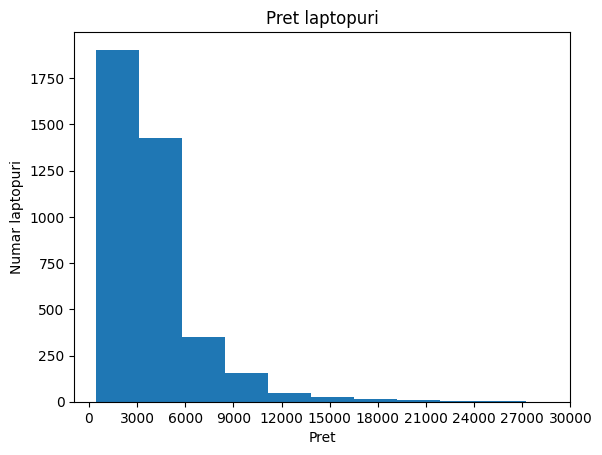

In [131]:
ax = df['Price'].plot(kind='hist', title="Pret laptopuri")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Pret')
ax.set_xticks(range(0, int(df['Price'].max()) + 3000, 3000))


### Coloana **Brand**

Text(0, 0.5, 'Numar de laptopuri')

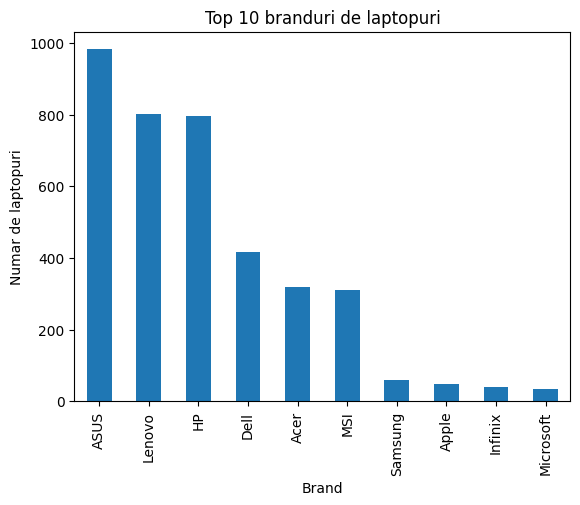

In [132]:
ax = df['Brand'].value_counts().head(10).plot(kind = 'bar', title="Top 10 branduri de laptopuri")
ax.set_ylabel('Numar de laptopuri')

### Coloana **Ghz**

Text(0.5, 0, 'Ghz')

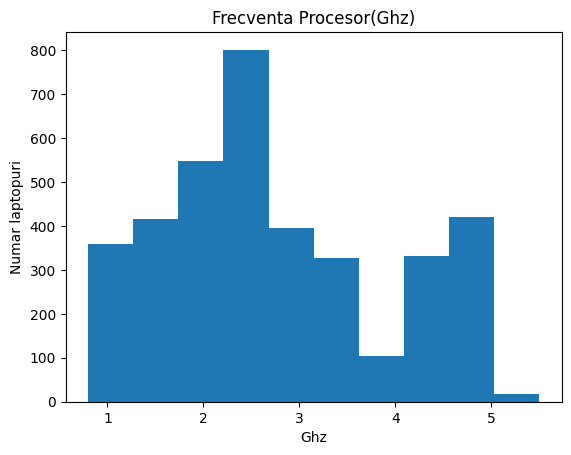

In [133]:
ax = df['Ghz'].plot(kind='hist', title="Frecventa Procesor(Ghz)")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Ghz')

### Coloana **Display**

Text(0.5, 0, 'Inch')

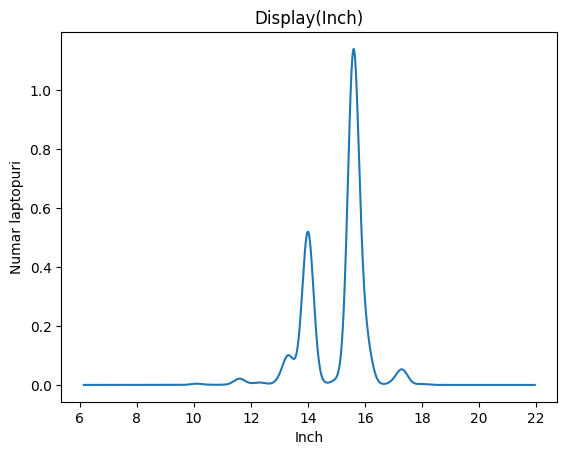

In [134]:
ax = df['Display'].plot(kind='kde', title="Display(Inch)")
ax.set_ylabel('Numar laptopuri')
ax.set_xlabel('Inch')

### Coloana **HDD**

<Axes: ylabel='count'>

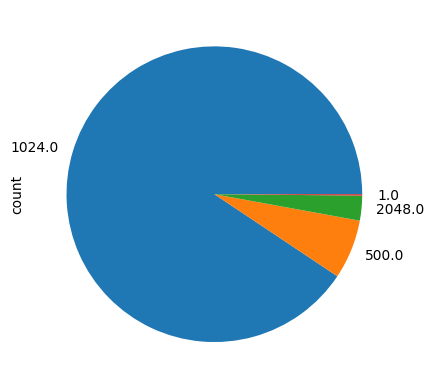

In [135]:
df['HDD'].value_counts().plot(kind='pie')

<Axes: ylabel='Frequency'>

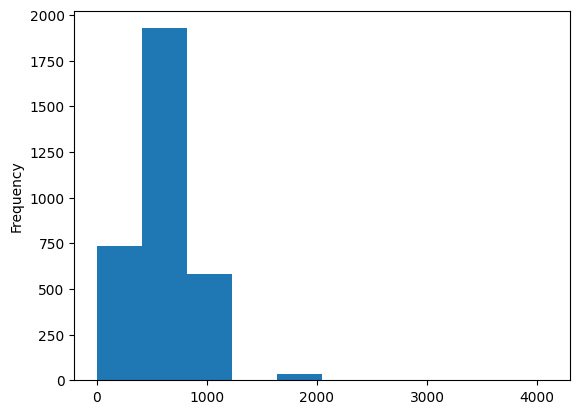

In [136]:
df['SSD'].plot(kind='hist')

### Coloana **RAM**

Text(0, 0.5, 'Numar de laptopuri')

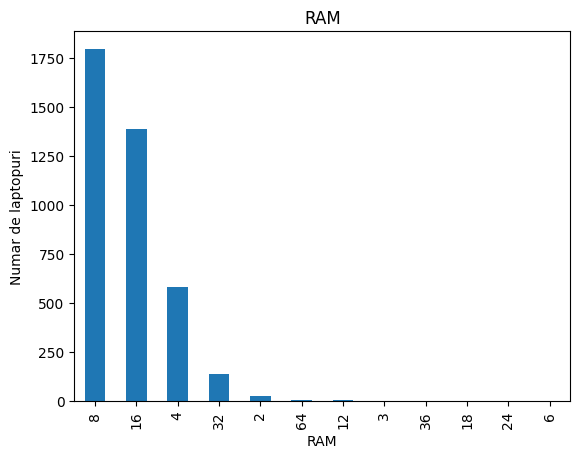

In [137]:
ax = df['RAM'].value_counts().plot(kind = 'bar', title="RAM")
ax.set_ylabel('Numar de laptopuri')

### Coloana **Adapter**

Text(0, 0.5, 'Numar de laptopuri')

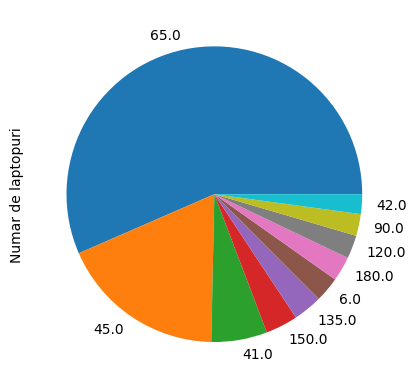

In [138]:
ax = df['Adapter'].value_counts().head(10).plot(kind = 'pie', title="")
ax.set_ylabel('Numar de laptopuri')

## Adaugare coloane noi

In [139]:
df['Has_SSD'] = df['SSD'].notna().astype(int) 
df['Has_HDD'] = df['HDD'].notna().astype(int)
df.head()

,Brand,Price,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU_Brand,SSD,HDD,Adapter,Has_SSD,Has_HDD
0,HP,1241.460,MediaTek,NaN,4,2.0,LED,11.6,MediaTek,64.0,NaN,45.0,1,0
1,Lenovo,1959.606,AMD,12.0,8,4.0,LCD,15.6,AMD,512.0,NaN,65.0,1,0
2,Dell,4239.000,Intel,32.0,16,3.3,LCD,15.6,NVIDIA,512.0,NaN,56.0,1,0
3,HP,2996.460,Intel,8.0,8,4.2,LCD,15.6,Intel,512.0,NaN,7.3,1,0
4,Infinix,1187.460,Intel,NaN,8,1.7,LCD,15.6,Intel,512.0,NaN,45.0,1,0


## Combinare coloane SSD si HDD
Cele 2 coloane reprezinta capacitatea in GB, asadar vor fi combinate, iar pentru a distinge tipul de stocare (SDD/HDD) vor fi folosite coloanele create anterior, Has_SSD si Has_HDD.

In [140]:
df['Storage'] = df['SSD'].fillna(0) + df['HDD'].fillna(0)

# stergere coloane SSD si HDD
df.drop(columns=['HDD', 'SSD'], inplace=True)

df.head()


,Brand,Price,Processor_Brand,RAM_Expandable,RAM,Ghz,Display_type,Display,GPU_Brand,Adapter,Has_SSD,Has_HDD,Storage
0,HP,1241.460,MediaTek,NaN,4,2.0,LED,11.6,MediaTek,45.0,1,0,64.0
1,Lenovo,1959.606,AMD,12.0,8,4.0,LCD,15.6,AMD,65.0,1,0,512.0
2,Dell,4239.000,Intel,32.0,16,3.3,LCD,15.6,NVIDIA,56.0,1,0,512.0
3,HP,2996.460,Intel,8.0,8,4.2,LCD,15.6,Intel,7.3,1,0,512.0
4,Infinix,1187.460,Intel,NaN,8,1.7,LCD,15.6,Intel,45.0,1,0,512.0


## Tratare valori lipsa

### Vizualizare procente valori lipsa

In [141]:
df.isna().mean()*100

Brand               0.000000
Price               0.000000
Processor_Brand     0.000000
RAM_Expandable     54.377062
RAM                 0.000000
Ghz                 5.658462
Display_type        0.000000
Display             0.025374
GPU_Brand           0.000000
Adapter            10.479574
Has_SSD             0.000000
Has_HDD             0.000000
Storage             0.000000
dtype: float64

### Eliminare coloane cu procent mare de valori lipsa
Coloana RAM_Expandable are un procent de 54% valori lipsa, asa ca va fi eliminata.

In [142]:
df.drop(columns=['RAM_Expandable'], inplace=True)
df.head()

,Brand,Price,Processor_Brand,RAM,Ghz,Display_type,Display,GPU_Brand,Adapter,Has_SSD,Has_HDD,Storage
0,HP,1241.460,MediaTek,4,2.0,LED,11.6,MediaTek,45.0,1,0,64.0
1,Lenovo,1959.606,AMD,8,4.0,LCD,15.6,AMD,65.0,1,0,512.0
2,Dell,4239.000,Intel,16,3.3,LCD,15.6,NVIDIA,56.0,1,0,512.0
3,HP,2996.460,Intel,8,4.2,LCD,15.6,Intel,7.3,1,0,512.0
4,Infinix,1187.460,Intel,8,1.7,LCD,15.6,Intel,45.0,1,0,512.0


### Inlocuire valori lipsa din coloana **Ghz**

#### Vizualizare mean, median si mode pentru a decide care va fi folosita pentru a inlocui valorile lipsa.

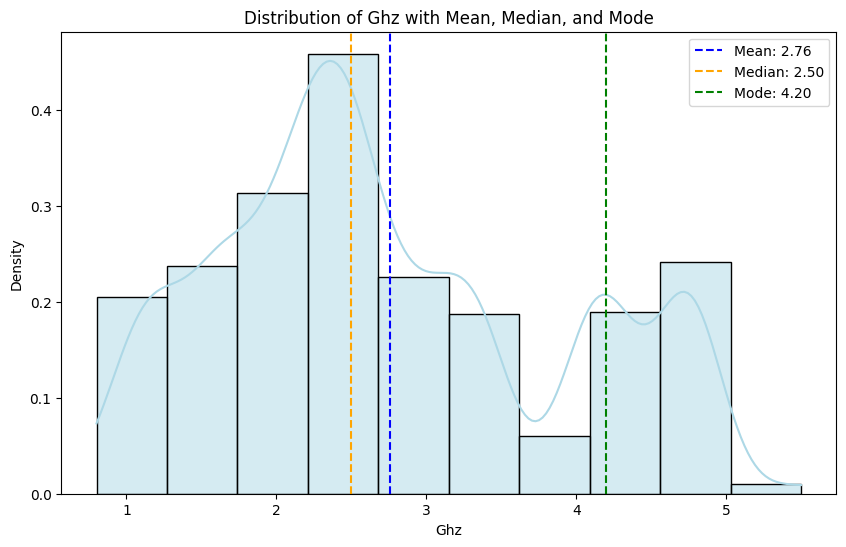

In [143]:
# Calculate mean, median, and mode
mean_ghz = df['Ghz'].mean()
median_ghz = df['Ghz'].median()
mode_ghz = df['Ghz'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Ghz'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_ghz, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_ghz))
plt.axvline(median_ghz, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_ghz))
plt.axvline(mode_ghz, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_ghz))

# Add titles and labels
plt.title('Distribution of Ghz with Mean, Median, and Mode')
plt.xlabel('Ghz')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Se obeserva ca distributia nu e comlpet normala. Mean e mai mare decat median, iar mode e mult mai mare decat amandoua. Asadar pentru a evita outlierii se va va folosi **median**. 

In [144]:
df['Ghz'] = df['Ghz'].fillna(median_ghz)
print(df.Ghz.isna().sum())

0


### Inlocuire valori lipsa din coloana **Display**
Coloana are un singur element lipsa, asadar va fi inlocuit cu valoare care apare de cele mai mlte ori(mode).

In [145]:
mode_display = df['Display'].mode()[0]
df['Display'] = df['Display'].fillna(mode_display)
print(df.Display.isna().sum())

0


### Inlocuire valori lipsa din coloana **Adapter**

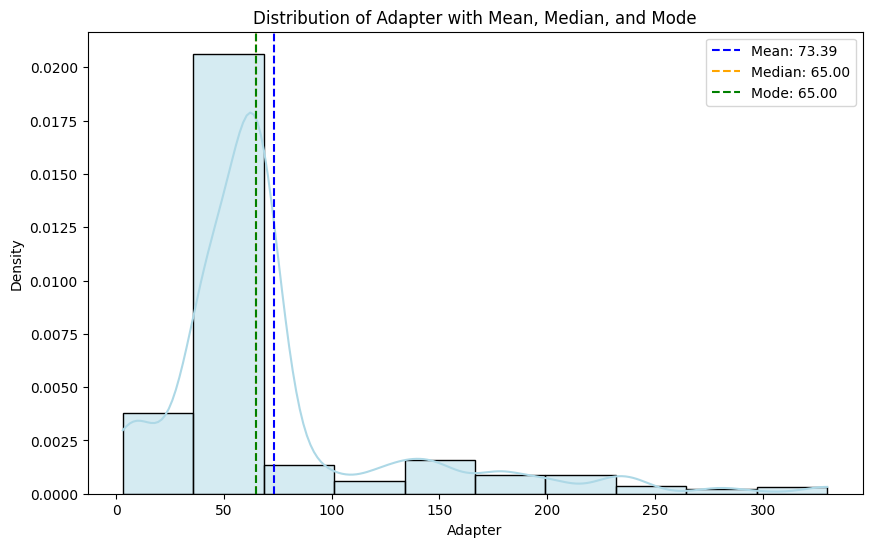

In [146]:
# Calculate mean, median, and mode
mean_adapter = df['Adapter'].mean()
median_adapter = df['Adapter'].median()
mode_adapter = df['Adapter'].mode()[0]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create a histogram with a kernel density estimate (KDE)
sns.histplot(df['Adapter'], bins=10, kde=True, color='lightblue', stat='density')

# Overlay the mean, median, and mode
plt.axvline(mean_adapter, color='blue', linestyle='--', label='Mean: {:.2f}'.format(mean_adapter))
plt.axvline(median_adapter, color='orange', linestyle='--', label='Median: {:.2f}'.format(median_adapter))
plt.axvline(mode_adapter, color='green', linestyle='--', label='Mode: {:.2f}'.format(mode_adapter))

# Add titles and labels
plt.title('Distribution of Adapter with Mean, Median, and Mode')
plt.xlabel('Adapter')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()

Se obeserva ca sunt multi outlieri, deci mean va fi afectata. Median si mode au aceeasi valoare, asadar vom alege una dintre ele, si anume **median**.

In [147]:
df['Adapter'] = df['Adapter'].fillna(median_adapter)
print(df.Adapter.isna().sum())

0


In [148]:
df.isna().sum()

Brand              0
Price              0
Processor_Brand    0
RAM                0
Ghz                0
Display_type       0
Display            0
GPU_Brand          0
Adapter            0
Has_SSD            0
Has_HDD            0
Storage            0
dtype: int64

## Corelatie

### Selectarea coloanelor numerice pentru matricea de corelatie

In [149]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns

,Price,RAM,Ghz,Display,Adapter,Has_SSD,Has_HDD,Storage
0,1241.460,4,2.0,11.6,45.0,1,0,64.0
1,1959.606,8,4.0,15.6,65.0,1,0,512.0
2,4239.000,16,3.3,15.6,56.0,1,0,512.0
3,2996.460,8,4.2,15.6,7.3,1,0,512.0
4,1187.460,8,1.7,15.6,45.0,1,0,512.0
...,...,...,...,...,...,...,...,...
3936,4589.460,8,1.6,14.0,65.0,1,0,512.0
3937,2161.674,8,4.0,15.6,65.0,1,0,256.0
3938,4103.460,16,3.1,15.6,120.0,1,0,1024.0
3939,3883.086,8,2.1,15.6,150.0,1,0,512.0


### Afisare matrice de corelatie

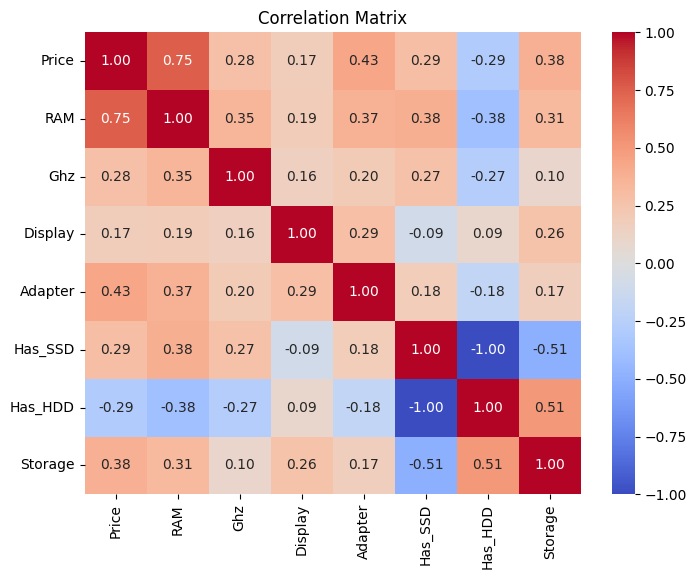

In [150]:
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## One-hot Encoding

Pentru a diferentia categoriile de branduri(laptop, cpu, gpu) la codificare se va specifica categoria in numele coloanei.


In [151]:
laptop_brands = pd.get_dummies(df['Brand'])
laptop_brands.columns = [col + "_Laptop" for col in laptop_brands.columns]

cpu_brands = pd.get_dummies(df['Processor_Brand'])
cpu_brands.columns = [col + "_CPU" for col in cpu_brands.columns]

gpu_brands = pd.get_dummies(df['GPU_Brand'])
gpu_brands.columns = [col + "_GPU" for col in gpu_brands.columns]

display_types = pd.get_dummies(df['Display_type'])
gpu_brands.columns = [col + "_Display" for col in gpu_brands.columns]

display_types = display_types.astype(int)
laptop_brands = laptop_brands.astype(int)
cpu_brands = cpu_brands.astype(int)
gpu_brands = gpu_brands.astype(int)

df = df.join(laptop_brands)
df = df.join(cpu_brands)
df = df.join(gpu_brands)

# stergere coloane
df.drop(['Display_type', 'Brand', 'Processor_Brand', 'GPU_Brand'], axis=1, inplace=True)

df.head()

,Price,RAM,Ghz,Display,Adapter,Has_SSD,Has_HDD,Storage,ASUS_Laptop,AVITA_Laptop,...,Qualcomm_CPU,AMD_GPU_Display,ARM_GPU_Display,ATI_GPU_Display,Apple_GPU_Display,Intel_GPU_Display,MediaTek_GPU_Display,Microsoft_GPU_Display,NVIDIA_GPU_Display,Qualcomm_GPU_Display
0,1241.460,4,2.0,11.6,45.0,1,0,64.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1959.606,8,4.0,15.6,65.0,1,0,512.0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,4239.000,16,3.3,15.6,56.0,1,0,512.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2996.460,8,4.2,15.6,7.3,1,0,512.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1187.460,8,1.7,15.6,45.0,1,0,512.0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Matricea de corelatie pentru toate coloanele

In [152]:
df.corr()

,Price,RAM,Ghz,Display,Adapter,Has_SSD,Has_HDD,Storage,ASUS_Laptop,AVITA_Laptop,...,Qualcomm_CPU,AMD_GPU_Display,ARM_GPU_Display,ATI_GPU_Display,Apple_GPU_Display,Intel_GPU_Display,MediaTek_GPU_Display,Microsoft_GPU_Display,NVIDIA_GPU_Display,Qualcomm_GPU_Display
Price,1.000000,0.751975,0.280489,0.172810,0.433341,0.293840,-0.293840,0.382694,0.059132,-0.050436,...,-0.012613,-0.191506,-0.013828,-0.007165,0.154169,-0.278940,-0.024840,-0.002263,0.417476,-0.012613
RAM,0.751975,1.000000,0.350234,0.187555,0.368467,0.383667,-0.383667,0.313705,0.060293,-0.041880,...,-0.017856,-0.129813,-0.017856,-0.007837,0.037428,-0.231465,-0.025150,-0.007837,0.339049,-0.017856
Ghz,0.280489,0.350234,1.000000,0.160979,0.200537,0.268842,-0.268842,0.099520,-0.079379,-0.054539,...,-0.003528,-0.004956,-0.010773,-0.013672,-0.013671,-0.186952,-0.013643,-0.003528,0.203695,-0.003528
Display,0.172810,0.187555,0.160979,1.000000,0.288459,-0.087671,0.087671,0.260535,0.061503,-0.091002,...,-0.016504,-0.004745,-0.076750,0.008212,-0.028512,-0.373061,-0.077659,-0.031952,0.407466,-0.016504
Adapter,0.433341,0.368467,0.200537,0.288459,1.000000,0.183596,-0.183596,0.170988,0.118463,-0.058827,...,-0.009404,-0.118711,-0.002241,-0.002241,-0.004055,-0.358712,-0.014225,-0.017761,0.469029,-0.009404
Has_SSD,0.293840,0.383667,0.268842,-0.087671,0.183596,1.000000,-1.000000,-0.507571,0.047004,0.034426,...,0.007158,-0.135151,0.007158,-0.035456,0.032887,-0.030758,0.012402,0.007158,0.129980,0.007158
Has_HDD,-0.293840,-0.383667,-0.268842,0.087671,-0.183596,-1.000000,1.000000,0.507571,-0.047004,-0.034426,...,-0.007158,0.135151,-0.007158,0.035456,-0.032887,0.030758,-0.012402,-0.007158,-0.129980,-0.007158
Storage,0.382694,0.313705,0.099520,0.260535,0.170988,-0.507571,0.507571,1.000000,0.066917,-0.071320,...,-0.023550,0.033861,-0.023550,0.018359,-0.007340,-0.172033,-0.040799,-0.023550,0.159769,-0.023550
ASUS_Laptop,0.059132,0.060293,-0.079379,0.061503,0.118463,0.047004,-0.047004,0.066917,1.000000,-0.044138,...,-0.009178,-0.035098,-0.009178,-0.009178,-0.042165,-0.072965,-0.015900,-0.009178,0.111827,-0.009178
AVITA_Laptop,-0.050436,-0.041880,-0.054539,-0.091002,-0.058827,0.034426,-0.034426,-0.071320,-0.044138,1.000000,...,-0.001221,0.021993,-0.001221,-0.001221,-0.005608,0.038659,-0.002115,-0.001221,-0.056149,-0.001221


## Gini Index

In [153]:
def gini_coefficient(data):
    sorted_data = np.sort(data)
    n = data.size
    cumulative_values = np.cumsum(sorted_data)
    gini_index = (n + 1 - 2 * np.sum(cumulative_values) / cumulative_values[-1]) / n
    return gini_index

gini_index_ghz = gini_coefficient(df['Ghz'].values)
gini_index_price = gini_coefficient(df['Price'].values)
gini_index_ram = gini_coefficient(df['RAM'].values)
gini_index_display = gini_coefficient(df['Display'].values)
gini_index_storage = gini_coefficient(df['Storage'].values)

print(f"Gini Index for Ghz: {gini_index_ghz:.4f}")
print(f"Gini Index for Price: {gini_index_price:.4f}")
print(f"Gini Index for RAM: {gini_index_ram:.4f}")
print(f"Gini Index for Disaply: {gini_index_display:.4f}")
print(f"Gini Index for Storage: {gini_index_storage:.4f}")


Gini Index for Ghz: 0.2252
Gini Index for Price: 0.3384
Gini Index for RAM: 0.2742
Gini Index for Disaply: 0.0339
Gini Index for Storage: 0.2696


### Curba lui Lorenz

In [154]:
def plot_lorenz_curve(series):

    # Step 1: Extract and sort the values
    sorted_values = np.sort(series.dropna())

    # Step 2: Calculate cumulative values
    n = len(sorted_values)
    cumulative_values = np.cumsum(sorted_values)
    total = cumulative_values[-1]
    cumulative_proportions = cumulative_values / total

    # Step 3: Create cumulative population proportions
    population_proportions = np.arange(1, n + 1) / n

    # Step 4: Plot the Lorenz curve
    plt.figure(figsize=(8, 6))
    plt.plot(population_proportions, cumulative_proportions, label='Lorenz Curve', color='blue')
    plt.plot([0, 1], [0, 1], label='Line of Equality', color='red', linestyle='--')
    plt.title(f'Lorenz Curve for {series.name}')
    plt.xlabel('Cumulative Share of Population')
    plt.ylabel('Cumulative Share of Values')
    plt.legend()
    plt.grid()
    plt.show()

#### Coloana **Ghz**

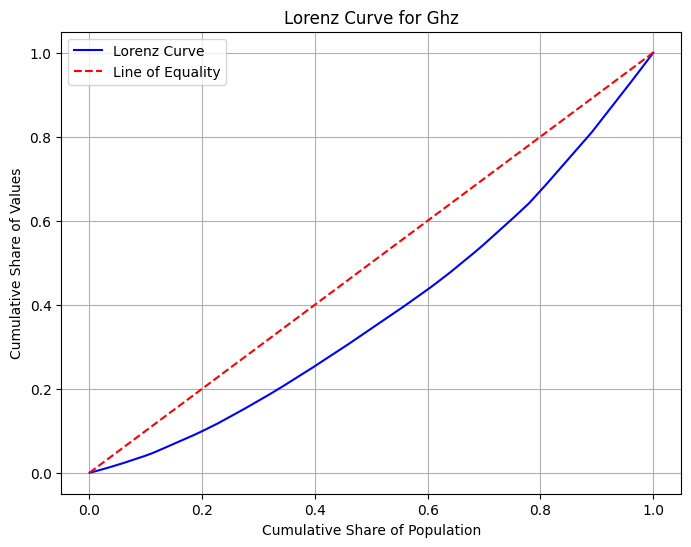

In [155]:
plot_lorenz_curve(df['Ghz'])

#### Coloana **Price**

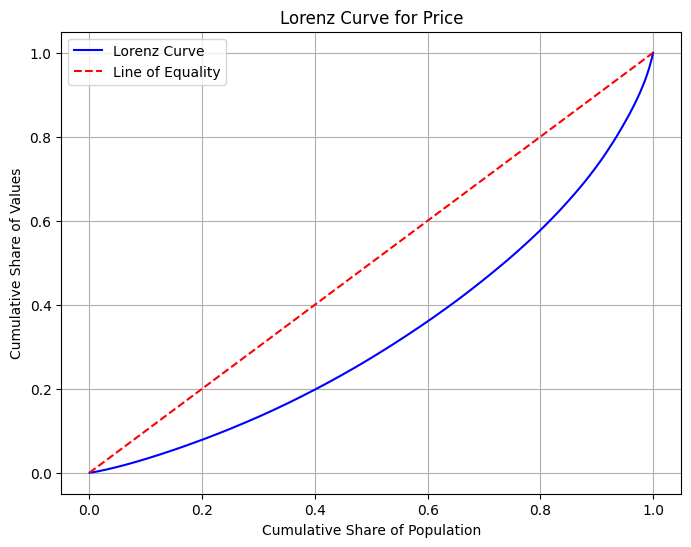

In [156]:
plot_lorenz_curve(df['Price'])

#### Coloana **RAM**

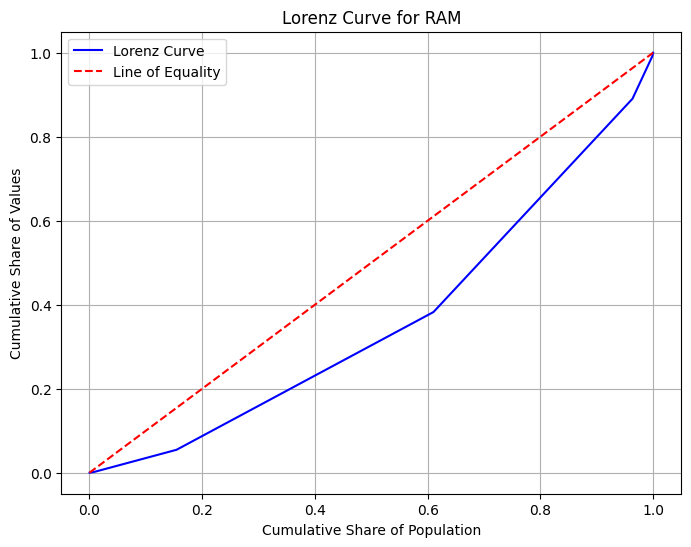

In [157]:
plot_lorenz_curve(df['RAM'])

#### Coloana **Display**

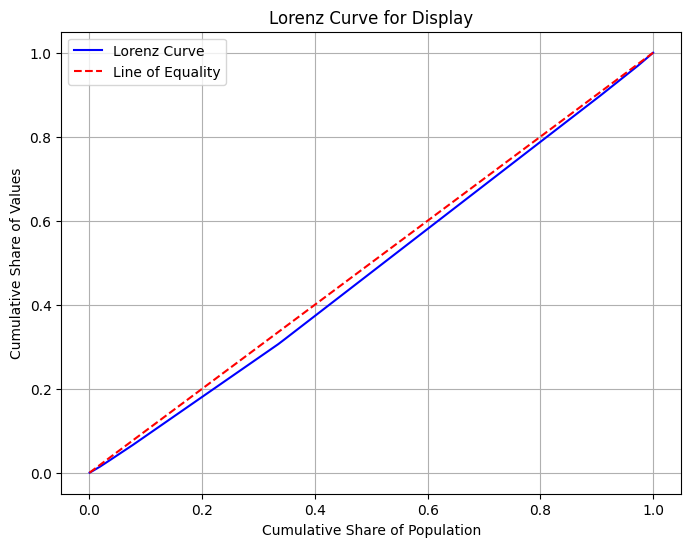

In [158]:
plot_lorenz_curve(df['Display'])

#### Coloana **Storage**

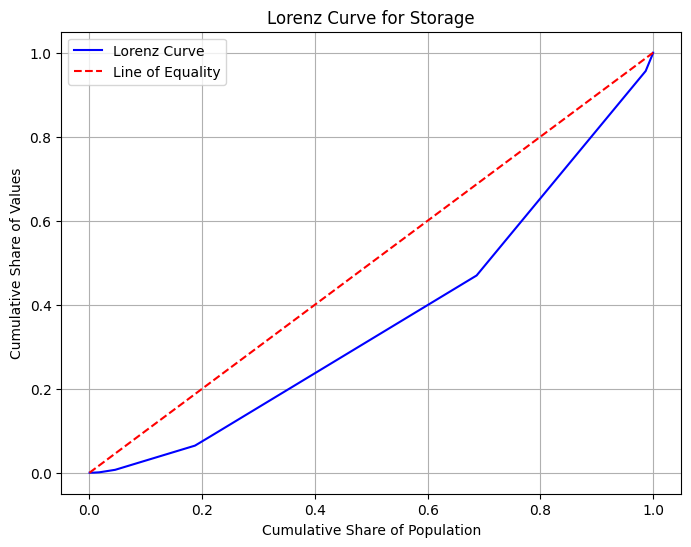

In [162]:
plot_lorenz_curve(df['Storage'])

## Relatii intre Price si celelalte coloane

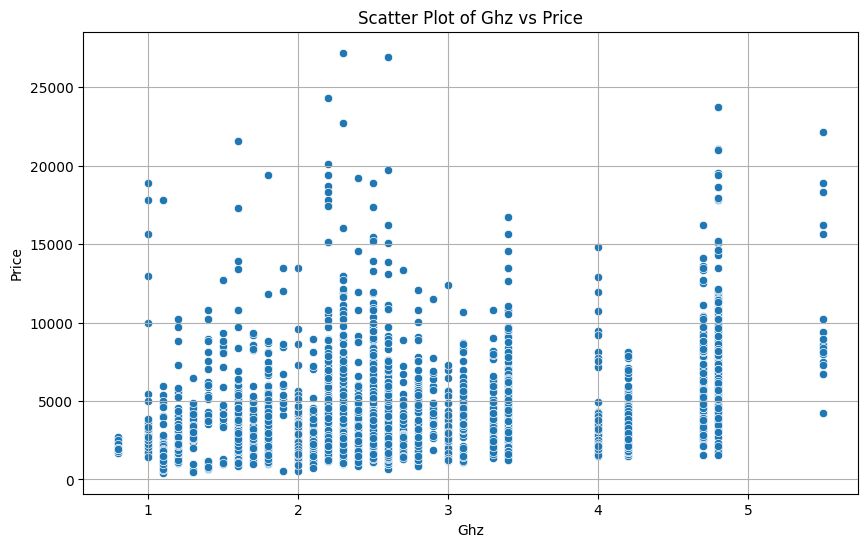

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ghz', y='Price')
plt.title('Scatter Plot of Ghz vs Price')
plt.xlabel('Ghz')
plt.ylabel('Price')
plt.grid()
plt.show()

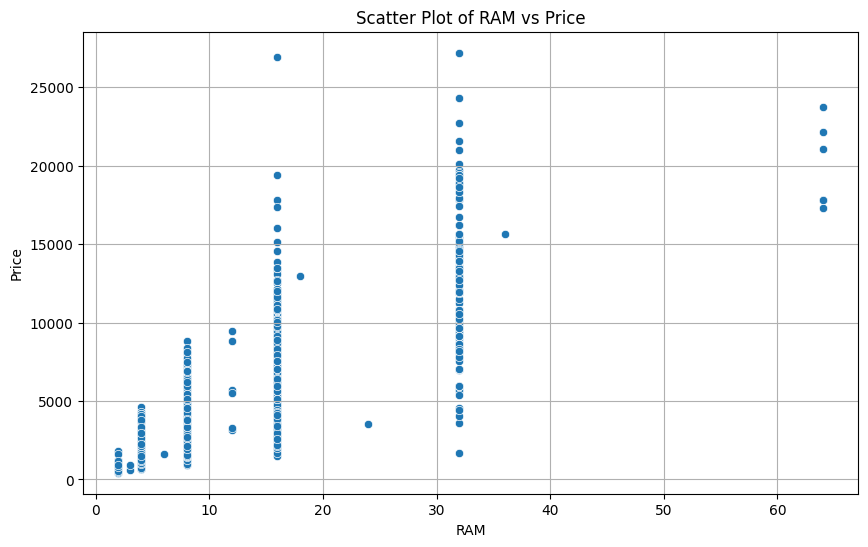

In [163]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='RAM', y='Price')
plt.title('Scatter Plot of RAM vs Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.grid()
plt.show()

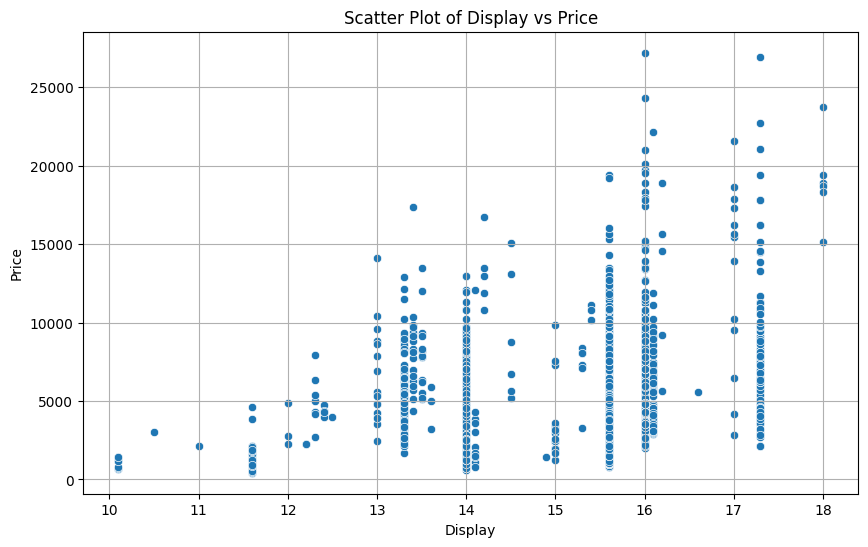

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Display', y='Price')
plt.title('Scatter Plot of Display vs Price')
plt.xlabel('Display')
plt.ylabel('Price')
plt.grid()
plt.show()

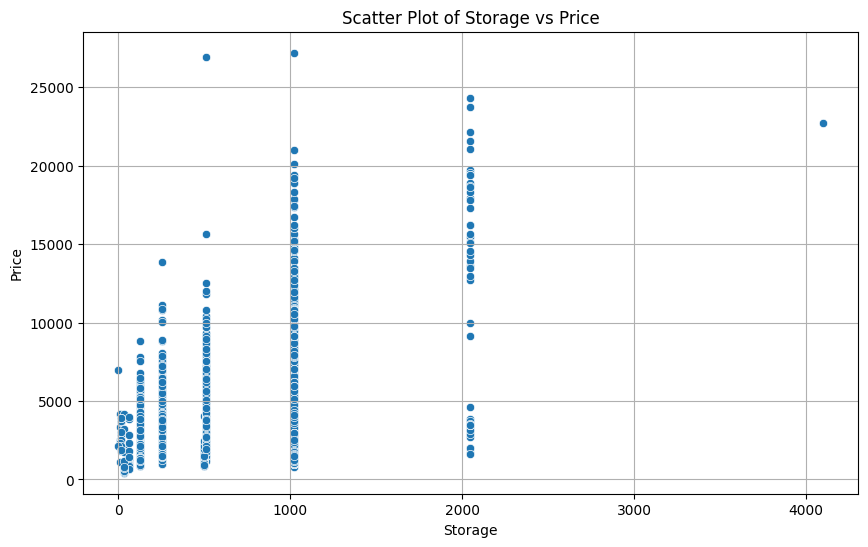

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Storage', y='Price')
plt.title('Scatter Plot of Storage vs Price')
plt.xlabel('Storage')
plt.ylabel('Price')
plt.grid()
plt.show()